In [10]:
from Task2 import * # contains our functions. see Task2.py for full source code
import time
import random
import matplotlib.pyplot as plt
import seaborn as sns
from memory_profiler import profile
%load_ext memory_profiler
sns.set_theme()

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


# `Task2` Functions:

Remark: The first two functions here are database functions. We created an example database instance to replicate what it would be like working with a production SQL DB. We also included another instance of iterative functions that use primarily SQL for fun. You don't have to grade us on that but we thought it would be a good exercise to complete this task using SQL :).

---

### Function: `initializeDatabaseInstance`
**Description:**  
Initializes an SQLite database instance in the repository, imports data from a CSV file, creates a table named `sales_data`, and fills it with the CSV data.

**Arguments:**  
None

**Returns:**  
None

---

### Function: `initializeDatabaseConnection`
**Description:**  
Initializes an SQLite connection and cursor to the sales database. User still has to close the database connection after use with `conn.close()`.

**Arguments:**  
None

**Returns:**  
- `conn`: Connection to the database.
- `cursor`: Cursor for database operations.

---

### Function: `getUniqueCustomers`
**Description:**  
Generates a list of unique customers from the `sales_data` table in the database.

**Arguments:**  
None

**Returns:**  
- `list`: List of unique customers from the sales database table.

---

### Function: `getMetricsIterative`
**Description:**  
Calculates average quantities of orders, lifespan, total profit, and profit margin for each unique customer in the sales database.

**Arguments:**  
None

**Returns:**  
- `dict`: Dictionary containing `meanOrderAmount`, `meanLifespanDays`, `meanTotalProfit`, and `meanProfitMargin`.

---

### Function: `getCLV_Iterative`
**Description:**  
Calculates the Customer Lifetime Value (CLV) using average metrics calculated from the entire sales database.

**Arguments:**  
None

**Returns:**  
- `float`: Customer Lifetime Value.

---

### Function: `getMetricsRecursive`
**Description:**  
Recursively calculates sales metrics such as average order quantities, lifespan, total profit, and profit margin. This function processes customers one at a time recursively, accumulating results.

**Arguments:**  
- `data` (`DataFrame`): Customer sales data table.
- `customerList` (`list`): List of unique customers, obtained from `getUniqueCustomers()`.
- `index` (`int`, optional): Current index in customer list. Default is 0.
- `results` (`dict`, optional): Stores intermediate results. Default is None.

**Returns:**  
- `dict`: Dictionary containing `meanOrderAmount`, `meanLifespanDays`, `meanTotalProfit`, and `meanProfitMargin`.

---

### Function: `getCLV_Recursive`
**Description:**  
Calculates the Customer Lifetime Value (CLV) using metrics provided, processed recursively.

**Arguments:**  
- `metrics` (`dict`): Metrics dictionary containing average sales data metrics.

**Returns:**  
- `float`: Customer Lifetime Value.

---

### Function: `getUniqueCustomersSQL`
**Description:**  
Fetches a distinct list of customer names directly from the SQL database using a DISTINCT query.

**Arguments:**  
None

**Returns:**  
- `list`: List of unique customer names from the sales database.

---

### Function: `getMetricsIterativeSQL`
**Description:**  
Directly computes sales metrics using SQL queries to perform aggregation functions. This method utilizes SQL to calculate and return average order amounts, lifespan days, total profit, and profit margins for each customer.

**Arguments:**  
None

**Returns:**  
- `dict`: Dictionary containing average values of order amounts, lifespan days, total profit, and profit margins.

---

### Function: `getCLV_IterativeSQL`
**Description:**  
Calculates the Customer Lifetime Value (CLV) using aggregated metrics obtained directly from SQL queries

**Arguments:**  
None

**Returns:**  
- `float`: Customer Lifetime Value.

---


## Performance
We will measure performance by analyzing the **exeuction time** and the **memory usage**.

### Execution Time
We can test the same outputs for all our functions we wrote. Manually, this would take a long time. However, similar to what we have learned in 620, why don't we make a bunch of test cases and compare the results of running each method against each case? From there, let's visualize the results.

We will use random to make lots of test cases, we will hold all the times, and we will plot everything using seaborn (This ones for you, Professor Jessica!). Without further adiue, let's go!

Database initialized. Displaying first 5 records of `sales_data` table:
(10107, 30, 95.7, 2, 2871.0, '2003-02-24', 'Shipped', 1, 2, 2003, 'Motorcycles', 95, 'S10_1678', 'Land of Toys Inc.', '2125557818', '897 Long Airport Avenue', None, 'NYC', 'NY', '10022', 'USA', None, 'Yu', 'Kwai', 'Small')
(10121, 34, 81.35, 5, 2765.9, '2003-05-07', 'Shipped', 2, 5, 2003, 'Motorcycles', 95, 'S10_1678', 'Reims Collectables', '26.47.1555', "59 rue de l'Abbaye", None, 'Reims', None, '51100', 'France', 'EMEA', 'Henriot', 'Paul', 'Small')
(10134, 41, 94.74, 2, 3884.34, '2003-07-01', 'Shipped', 3, 7, 2003, 'Motorcycles', 95, 'S10_1678', 'Lyon Souveniers', '+33 1 46 62 7555', '27 rue du Colonel Pierre Avia', None, 'Paris', None, '75508', 'France', 'EMEA', 'Da Cunha', 'Daniel', 'Medium')
(10145, 45, 83.26, 6, 3746.7, '2003-08-25', 'Shipped', 3, 8, 2003, 'Motorcycles', 95, 'S10_1678', 'Toys4GrownUps.com', '6265557265', '78934 Hillside Dr.', None, 'Pasadena', 'CA', '90003', 'USA', None, 'Young', 'Julie', 'Me

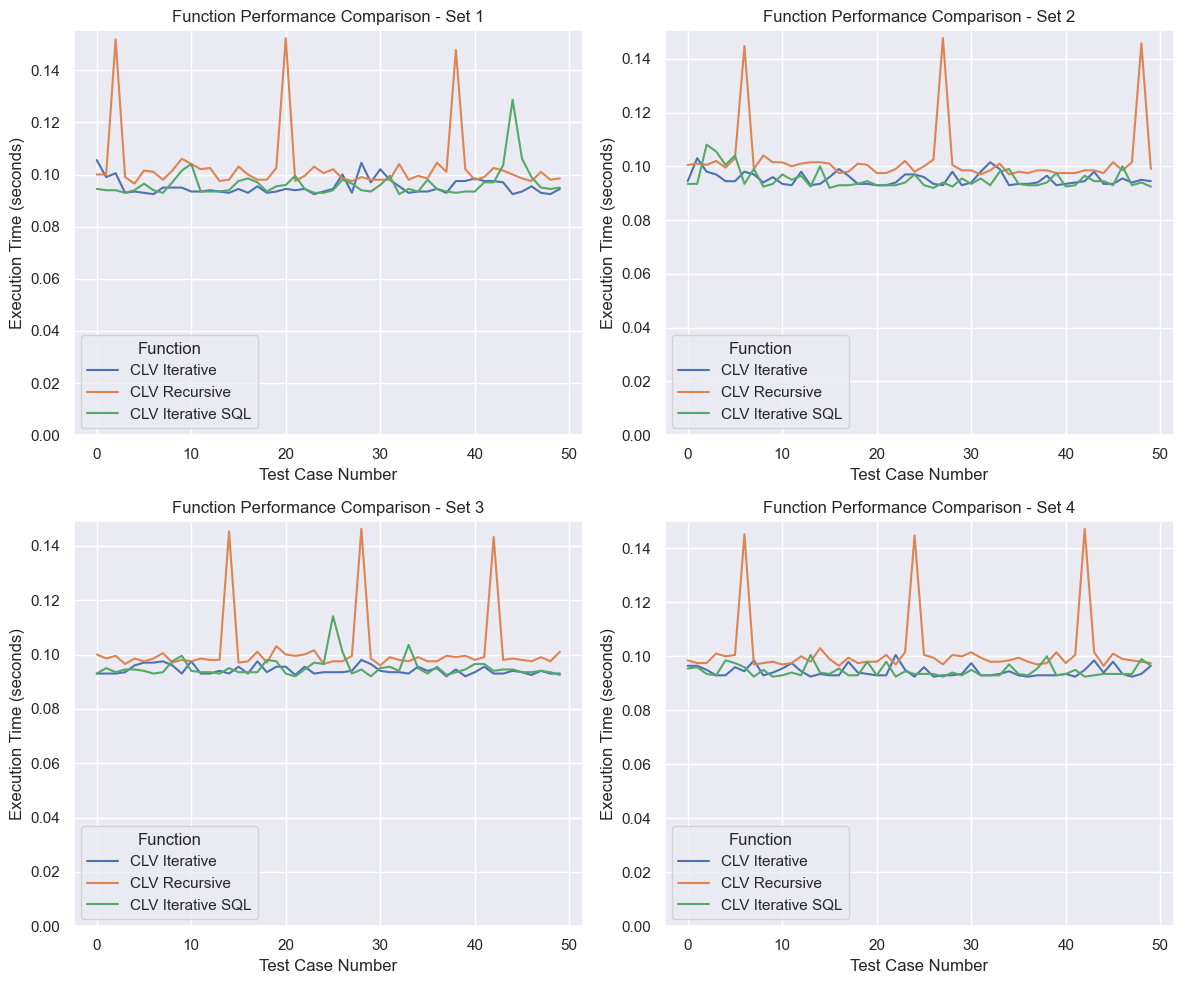

In [12]:
def time_function(func):
    """ Utility function to measure the execution time of a single function call. """
    start_time = time.time()
    func()
    end_time = time.time()
    return end_time - start_time

def generate_test_cases(num_cases, func):
    """ Generates execution times for a number of test cases. """
    times = []
    for _ in range(num_cases):
        duration = time_function(func)
        times.append(duration)
    return times

def plot_function_performance(functions, num_cases=50, num_sets=4):
    """ Plots the performance of multiple functions in a 2x2 subplot configuration for different sets of runs. """
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))  
    axes = axes.flatten()  
    for i, ax in enumerate(axes):
        for func_name, func in functions.items():
            execution_times = generate_test_cases(num_cases, func)
            sns.lineplot(x=range(num_cases), y=execution_times, label=func_name, ax=ax)
        ax.set_title(f'Function Performance Comparison - Set {i + 1}')
        ax.set_xlabel('Test Case Number')
        ax.set_ylabel('Execution Time (seconds)')
        ax.legend(title='Function')
        ax.set_ylim(0)  

    plt.tight_layout()
    plt.show()

def get_metrics_setup():
    return getCLV_Iterative, mainRecursive, getCLV_IterativeSQL

initializeDatabaseInstance()  
getCLV_Iterative, mainRecursive, getCLV_IterativeSQL = get_metrics_setup()


functions_to_test = {
    'CLV Iterative': getCLV_Iterative,
    'CLV Recursive': mainRecursive,
    'CLV Iterative SQL': getCLV_IterativeSQL
}

plot_function_performance(functions_to_test, num_cases=50, num_sets=4)
